Homework 4: Sentiment Analysis - Task 4
----

Names & Sections
----
Names: Shashidhar Gollamudi - 6120
       Sunny Huang - 4120


Task 4: Neural Networks (20 points)
----

Next, we'll train a feedforward neural net to work with this data. You'll train one neural net which takes the same input as your Logistic Regression model - a sparse vector representing documents as bags of words.

In [1]:
import sentiment_utils as sutils
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

# you can experiment with having some Dropout layers if you'd like to
# this is not required
from keras.layers import Dropout

# if you want to use this again
from sklearn.feature_extraction.text import CountVectorizer



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sunnyh2024/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

x_train, y_train = train_tups
x_dev, y_dev = dev_tups

# you may use either your sparse vectors or sklearn's CountVectorizer's sparse vectors
# you will experiment with multinomial and binarized representations later

# USING SUTILS FUNCTIONS SLOWS DOWN MODEL.FIT ALOT
# vocab = sutils.create_index(x_train)
# x_train_vectors = sutils.featurize(vocab, x_train, binary=False)
# x_dev_vectors = sutils.featurize(vocab, x_dev, binary=False)

x_train_sents = [' '.join(review) for review in x_train]
x_dev_sents = [' '.join(review) for review in x_dev]

count_vectorizer = CountVectorizer(binary=False)
count_vectorizer.fit(x_train_sents)

count_vectorizer_binomial = CountVectorizer(binary=True)
count_vectorizer_binomial.fit(x_train_sents)

x_train_vectors = count_vectorizer.transform(x_train_sents)
x_dev_vectors = count_vectorizer.transform(x_dev_sents)

x_train_vectors_binomial = count_vectorizer_binomial.transform(x_train_sents)
x_dev_vectors_binomial = count_vectorizer_binomial.transform(x_dev_sents)

vocab = count_vectorizer.get_feature_names_out()

print(f'Vocab size: {len(vocab)}')

22596
Vocab size: 22596


In [3]:
# Create a feedforward neural network model
# that takes a sparse BoW representation of the data as input
# and makes a binary classification of positive/negative sentiment as output
# you may use any number of hidden layers >= 1 and any number of units in each hidden layer (we recommend between 50-200)
# you may use any activation function on the hidden layers 
# you should use a sigmoid activation function on the output layer
# you should use binary cross-entropy as your loss function
# sgd is an appropriate optimizer for this task
# you should report accuracy as your metric
# you may add Dropout layers if you'd like to
num_epochs = 3
hidden_units = 100

# create/compile your model in this cell
model = Sequential()

model.add(Dense(units=hidden_units, activation="relu", input_dim=len(vocab)))

# put in an output layer
model.add(Dense(units=1, activation='sigmoid'))

model.summary()
# call compile here
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
              )


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2259700   
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________


How many trainable parameters does your model have? __2,259,801__

In [4]:
# train your model
# Felix's computer takes about 2 sec for 3 epochs
# reports an accuracy of 0.78 at that point using the sgd optimizer

model.fit(x_train_vectors, np.array(y_train), epochs=num_epochs, verbose=1)

# Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})
# indicates you should change a list into a numpy array



Epoch 1/3
 1/50 [..............................] - ETA: 8s - loss: 0.7079 - accuracy: 0.4375

2023-10-25 14:30:25.902151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:30:25.902298: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:30:26.040303: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


50/50 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5919
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6214 - accuracy: 0.6744
Epoch 3/3
50/50 [==============================] - 0s 1ms/step - loss: 0.5974 - accuracy: 0.6925


In [5]:
# make a prediction on the dev set
# then make a classification decision based on that prediction
# predicting all examples takes < 1 sec on Felix's computer
preds = model.predict(x_dev_vectors, verbose=1)
preds = [np.round(pred[0]) for pred in preds]
print(preds)

7/7 [==============================] - 0s 920us/step
[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1

2023-10-25 14:30:26.316332: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]


In [6]:
# use the model.evaluate function to report the loss and accuracy on the dev set
metrics = model.evaluate(x_dev_vectors, np.array(y_dev), verbose=1)
print(f'Loss: {metrics[0]}')
print(f'Accuracy: {metrics[1]}')

7/7 [==============================] - 0s 1ms/step - loss: 0.6106 - accuracy: 0.7000
Loss: 0.6106128096580505
Accuracy: 0.699999988079071


2023-10-25 14:30:26.372106: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [200]
	 [[{{node Placeholder/_1}}]]


Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 100)               2259700   
                                                                 
 dense_63 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


5/5 [==============================] - 0s 2ms/step - loss: 0.7195 - accuracy: 0.5437
Epoch 2/3
5/5 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5500
Epoch 3/3
5/5 [==============================] - 0s 1ms/step - loss: 0.6459 - accuracy: 0.6562


2023-10-25 14:35:39.906229: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [160]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:39.906413: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [160]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:40.094306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]


7/7 [==============================] - 0s 1ms/step
Metrics when trained on 10% of data
Precision: 0.5226130653266332
Recall: 0.9904761904761905
F1 score: 0.6842105263157895
Accuracy: 0.52
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 100)               2259700   
                                                                 
 dense_65 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
10/10 [==============================] - 0s 2ms/step - loss: 0.7082 - accuracy: 0.5375
Epoch 2/3


2023-10-25 14:35:40.147448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [320]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:40.147600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [320]
	 [[{{node Placeholder/_1}}]]


10/10 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6687
Epoch 3/3
7/7 [==============================] - 0s 827us/step
Metrics when trained on 20% of data
Precision: 0.5255102040816326
Recall: 0.9809523809523809
F1 score: 0.6843853820598007
Accuracy: 0.525
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 100)               2259700   
                                                                 
 dense_67 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:40.385221: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:40.438346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [480]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:40.438516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [480]


15/15 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5333
Epoch 2/3
15/15 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.6104
Epoch 3/3
7/7 [==============================] - 0s 795us/step
Metrics when trained on 30% of data
Precision: 0.7012987012987013
Recall: 0.5142857142857142
F1 score: 0.5934065934065934
Accuracy: 0.63
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 100)               2259700   
                                                                 
 dense_69 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:40.706148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:40.757223: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [640]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:40.757378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [640]


20/20 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.5375
Epoch 2/3
20/20 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6703
Epoch 3/3
7/7 [==============================] - 0s 789us/step
Metrics when trained on 40% of data
Precision: 0.7619047619047619
Recall: 0.45714285714285713
F1 score: 0.5714285714285714
Accuracy: 0.64
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 100)               2259700   
                                                                 
 dense_71 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:41.008042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:41.056792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [800]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:41.056939: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [800]


25/25 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5325
Epoch 2/3
25/25 [==============================] - 0s 2ms/step - loss: 0.6384 - accuracy: 0.6787
Epoch 3/3
7/7 [==============================] - 0s 898us/step
Metrics when trained on 50% of data
Precision: 0.7157894736842105
Recall: 0.6476190476190476
F1 score: 0.68
Accuracy: 0.68
Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 100)               2259700   
                                                                 
 dense_73 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:41.359761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:41.413480: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [960]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:41.413631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [960]


30/30 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.5552
Epoch 2/3
30/30 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.6292
Epoch 3/3
7/7 [==============================] - 0s 787us/step
Metrics when trained on 60% of data
Precision: 0.7021276595744681
Recall: 0.6285714285714286
F1 score: 0.6633165829145728
Accuracy: 0.665
Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 100)               2259700   
                                                                 
 dense_75 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:41.939400: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:41.990705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:41.990846: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120

35/35 [==============================] - 0s 1ms/step - loss: 0.6891 - accuracy: 0.5571
Epoch 2/3
35/35 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.6339
Epoch 3/3
7/7 [==============================] - 0s 980us/step
Metrics when trained on 70% of data
Precision: 0.6727272727272727
Recall: 0.7047619047619048
F1 score: 0.6883720930232559
Accuracy: 0.665
Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 100)               2259700   
                                                                 
 dense_77 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:42.298628: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:42.348640: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [1280,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:42.348810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [

40/40 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5719
Epoch 2/3
40/40 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.6727
Epoch 3/3
7/7 [==============================] - 0s 816us/step
Metrics when trained on 80% of data
Precision: 0.5783132530120482
Recall: 0.9142857142857143
F1 score: 0.7084870848708487
Accuracy: 0.605
Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 100)               2259700   
                                                                 
 dense_79 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
 1/45 [..............................] - ETA

2023-10-25 14:35:42.700166: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:42.749786: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1440]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:42.749941: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1440

45/45 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5688
Epoch 2/3
45/45 [==============================] - 0s 1ms/step - loss: 0.6202 - accuracy: 0.6819
Epoch 3/3
7/7 [==============================] - 0s 932us/step
Metrics when trained on 90% of data
Precision: 0.680327868852459
Recall: 0.7904761904761904
F1 score: 0.7312775330396476
Accuracy: 0.695
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 100)               2259700   
                                                                 
 dense_81 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:43.098295: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:43.149886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:43.150033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600

50/50 [==============================] - 0s 1ms/step - loss: 0.6819 - accuracy: 0.5556
Epoch 2/3
50/50 [==============================] - 0s 1ms/step - loss: 0.6345 - accuracy: 0.6513
Epoch 3/3
7/7 [==============================] - 0s 776us/step
Metrics when trained on 100% of data
Precision: 0.7837837837837838
Recall: 0.5523809523809524
F1 score: 0.6480446927374302
Accuracy: 0.685


2023-10-25 14:35:43.523317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]


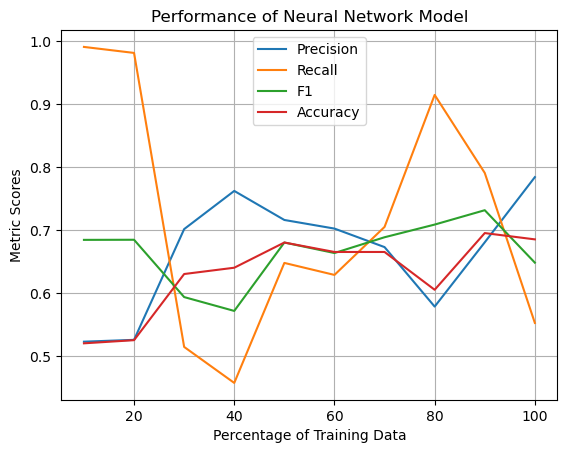

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_82 (Dense)            (None, 100)               2259700   
                                                                 
 dense_83 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:43.649160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [160]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:43.649525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [160]
	 [[{{node Placeholder/_1}}]]


5/5 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.4125
Epoch 2/3
5/5 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.4938
Epoch 3/3
7/7 [==============================] - 0s 841us/step
Metrics when trained on 10% of data
Precision: 0.515625
Recall: 0.3142857142857143
F1 score: 0.3905325443786982
Accuracy: 0.485
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 100)               2259700   
                                                                 
 dense_85 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:43.869932: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:43.921993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [320]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:43.922171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [320]


10/10 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5469
Epoch 2/3
10/10 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.6531
Epoch 3/3
7/7 [==============================] - 0s 807us/step
Metrics when trained on 20% of data
Precision: 0.6865671641791045
Recall: 0.4380952380952381
F1 score: 0.5348837209302325
Accuracy: 0.6
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 100)               2259700   
                                                                 
 dense_87 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:44.143465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:44.195344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [480]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:44.195502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [480]


15/15 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.5188
Epoch 2/3
15/15 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.6042
Epoch 3/3
7/7 [==============================] - 0s 818us/step
Metrics when trained on 30% of data
Precision: 0.6779661016949152
Recall: 0.7619047619047619
F1 score: 0.7174887892376681
Accuracy: 0.685
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 100)               2259700   
                                                                 
 dense_89 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:44.478837: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:44.532582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [640]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:44.532732: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [640]


20/20 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4859
Epoch 2/3
20/20 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.5922
Epoch 3/3
7/7 [==============================] - 0s 807us/step
Metrics when trained on 40% of data
Precision: 0.5604395604395604
Recall: 0.9714285714285714
F1 score: 0.710801393728223
Accuracy: 0.585
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 100)               2259700   
                                                                 
 dense_91 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:44.789830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:44.839578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [800,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:44.839739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [8

25/25 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5275
Epoch 2/3
25/25 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6800
Epoch 3/3
7/7 [==============================] - 0s 929us/step
Metrics when trained on 50% of data
Precision: 0.6638655462184874
Recall: 0.7523809523809524
F1 score: 0.7053571428571429
Accuracy: 0.67
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_92 (Dense)            (None, 100)               2259700   
                                                                 
 dense_93 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:45.117361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:45.168175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [960]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:45.168325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [960]


30/30 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5437
Epoch 2/3
30/30 [==============================] - 0s 1ms/step - loss: 0.6716 - accuracy: 0.6729
Epoch 3/3
7/7 [==============================] - 0s 761us/step
Metrics when trained on 60% of data
Precision: 0.8441558441558441
Recall: 0.6190476190476191
F1 score: 0.7142857142857143
Accuracy: 0.74
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_94 (Dense)            (None, 100)               2259700   
                                                                 
 dense_95 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:45.456896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:45.504568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:45.504715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1120

35/35 [==============================] - 0s 1ms/step - loss: 0.6890 - accuracy: 0.5366
Epoch 2/3
35/35 [==============================] - 0s 1ms/step - loss: 0.6674 - accuracy: 0.7116
Epoch 3/3
7/7 [==============================] - 0s 742us/step
Metrics when trained on 70% of data
Precision: 0.7477477477477478
Recall: 0.7904761904761904
F1 score: 0.7685185185185185
Accuracy: 0.75
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 100)               2259700   
                                                                 
 dense_97 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
 1/40 [..............................] - ETA:

2023-10-25 14:35:45.829239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:45.878120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1280]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:45.878270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1280

40/40 [==============================] - 0s 1ms/step - loss: 0.6874 - accuracy: 0.5695
Epoch 2/3
40/40 [==============================] - 0s 1ms/step - loss: 0.6599 - accuracy: 0.7305
Epoch 3/3
7/7 [==============================] - 0s 761us/step
Metrics when trained on 80% of data
Precision: 0.6274509803921569
Recall: 0.9142857142857143
F1 score: 0.7441860465116279
Accuracy: 0.67
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 100)               2259700   
                                                                 
 dense_99 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3


2023-10-25 14:35:46.198291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:46.247451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1440]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:46.247597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1440

45/45 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5264
Epoch 2/3
45/45 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.6826
Epoch 3/3
7/7 [==============================] - 0s 784us/step
Metrics when trained on 90% of data
Precision: 0.810126582278481
Recall: 0.6095238095238096
F1 score: 0.6956521739130435
Accuracy: 0.72
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_100 (Dense)           (None, 100)               2259700   
                                                                 
 dense_101 (Dense)           (None, 1)                 101       
                                                                 
Total params: 2,259,801
Trainable params: 2,259,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
 1/50 [..............................] - ETA: 

2023-10-25 14:35:46.591034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]
2023-10-25 14:35:46.639767: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600]
	 [[{{node Placeholder/_1}}]]
2023-10-25 14:35:46.639911: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [1600

50/50 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5462
Epoch 2/3
50/50 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.7181
Epoch 3/3
7/7 [==============================] - 0s 795us/step
Metrics when trained on 100% of data
Precision: 0.7264957264957265
Recall: 0.8095238095238095
F1 score: 0.7657657657657657
Accuracy: 0.74


2023-10-25 14:35:47.030824: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype variant and shape [200,3]
	 [[{{node Placeholder/_0}}]]


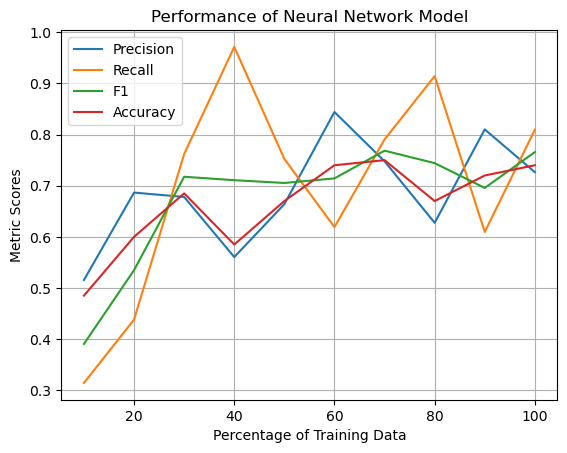

In [10]:
# create the same graph as with NB and LR, with your neural network model instead!
# make sure to re-create your model each time you train it — you don't want to start with
# an already trained network!

# For a model with one hidden layer of 50 units:
# Takes < 15 sec to run on Felix's computer w/ 3 epochs
# Takes < 30 sec to run on Felix's computer w/ 10 epochs
# Takes < 50 sec to run on Felix's computer w/ 20 epochs
# you need not train your model more than 20 epochs
# you should experiment with different numbers of epochs to see how performance varies
# you need not create an experiment that takes > 10 min to run (please do not do this)
def nn_metrics_fun(train_feats, dev_feats, percentage):
    num_epochs = 3
    hidden_units = 100

    model = Sequential()
    model.add(Dense(units=hidden_units, activation="relu", input_dim=len(vocab)))
    # put in an output layer
    model.add(Dense(units=1, activation='sigmoid'))
    model.summary()
    # call compile here
    model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy']
                )
    x_train_vectors, y_train = train_feats
    x_dev_vectors, y_dev = dev_feats

    cutoff = int(len(y_train) * percentage)
    model.fit(x_train_vectors[:cutoff], np.array(y_train[:cutoff]), epochs=num_epochs)
    preds = model.predict(x_dev_vectors)
    preds = [np.round(pred[0]) for pred in preds]
    return preds, y_dev

train_feats = (x_train_vectors, y_train)
dev_feats = (x_dev_vectors, y_dev)

train_feats_binomial = (x_train_vectors_binomial, y_train)
dev_feats_binomial = (x_dev_vectors_binomial, y_dev)

sutils.create_training_graph(nn_metrics_fun, train_feats, dev_feats, "Neural Network", verbose=True)
sutils.create_training_graph(nn_metrics_fun, train_feats_binomial, dev_feats_binomial, "Neural Network", verbose=True)



Report the f1 scores for your model with the following settings, using the same number of epochs to train in both cases:
- number of epochs used: __3__
- multinomial features: __0.6480446927374302__ 
- binarized features: __0.7657657657657657__